#**2. Extract Feature:**


##**2.1 Import thư viện:**


In [1]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject


In [2]:
from Preprocessing.Preprocessor import preprocessing
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature, exposure

##**2.2 Các kĩ thuật Extract Feature:**


###**Image Test:**


In [3]:
PathImage = '/content/drive/My Drive/Colab Notebooks/Capstone_Dataset/Train/E/IMG_3948.JPG'
ImgTest = cv2.imread(PathImage)
ImgTest = preprocessing(ImgTest)

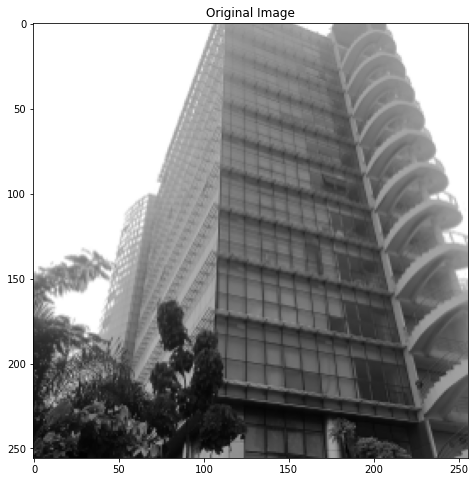

In [4]:
plt.figure(figsize=(8,8))
plt.title('Original Image')
plt.imshow(cv2.cvtColor(ImgTest,cv2.COLOR_BGR2RGB))

###**2.2.1 Image to vector:**


+ Sau khi Preprocessing, thì ảnh ban đầu thành ảnh Grayscale 256 x 256. Ta sẽ coi như mỗi pixel của bức ảnh là một đặc trưng và reshape ảnh lại thành một vector đặc trưng (65536, ). 
> Ví dụ:
> 
> <img src="https://drive.google.com/uc?id=1keKFFTFRPh9tSuGYKYxq8fZ49krv9XH3" width=500 />

+ Chia mỗi phần tử của Vector cho 255 để chuẩn hóa các giá trị nằm trong khoảng $[0,1]$

In [5]:
print('+ 2D pixel: \n {}'.format(ImgTest))

Img_to_vec = np.array(ImgTest).flatten()/255.
print('\n+ Vectorize Image: \n {}'.format(Img_to_vec))

+ 2D pixel: 
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 67  22  35 ... 153 154 156]
 [ 11  11  47 ... 152 154 155]
 [ 22  17  16 ... 152 153 154]]

+ Vectorize Image: 
 [1.         1.         1.         ... 0.59607843 0.6        0.60392157]


###**2.2.2 Local binary pattern:**

In [6]:
ImgLBP = feature.local_binary_pattern(ImgTest, 24, 8, method="uniform")

In [7]:
(hist, _) = np.histogram(ImgLBP.ravel(),bins=np.arange(0, 24 + 3),range=(0, 24 + 2))
hist = hist.astype("float")

hist /= (hist.sum() + 1e-7)

Text(0.5, 1.0, 'Relative Frequency Histogram')

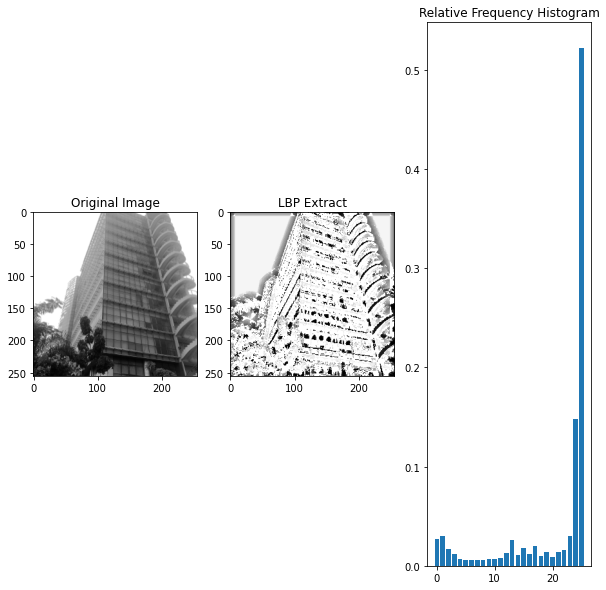

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,10))
ax1.imshow(ImgTest,cmap=plt.get_cmap('gray'))
ax1.set_title('Original Image')
ax2.imshow(ImgLBP,cmap=plt.get_cmap('gray'))
ax2.set_title('LBP Extract')
ax3.bar(np.arange(0,len(hist)),hist)
ax3.set_title('Relative Frequency Histogram')

###**2.2.3 Histogram of Oriented Gradients (HOG):**

In [9]:
_,ImgHOG = feature.hog(ImgTest, orientations=9, pixels_per_cell=(8, 8),
			                cells_per_block=(2, 2), transform_sqrt=True, 
							block_norm="L2-Hys",visualize=True)
ImgHOG = exposure.rescale_intensity(ImgHOG, out_range=(0, 255))

Text(0.5, 1.0, 'HOG Extract')

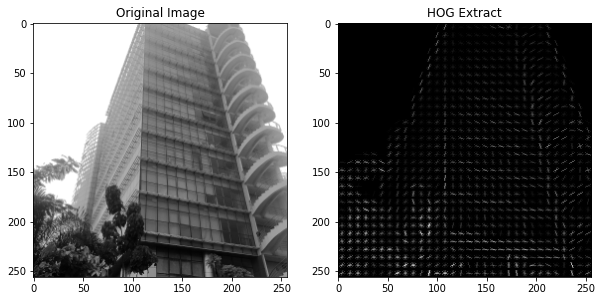

In [10]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(ImgTest,cmap=plt.get_cmap('gray'))
ax1.set_title('Original Image')
ax2.imshow(ImgHOG,cmap=plt.get_cmap('gray'))
ax2.set_title('HOG Extract')

##**2.3 Ghi vào file ExtractFeature.py**

In [11]:
%cd '/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/FeatureExtraction'

/content/drive/My Drive/Colab Notebooks/CS114.K21.KHTN/[Capstone Study] New_ML_FinalProject/FeatureExtraction


In [12]:
# %%writefile ExtractFeature.py
# from skimage import feature
# import numpy as np

# def Img_to_Vec(Img):
#     return np.array(Img).flatten()/255.

# def HOG(Img,self_orientations=9,self_pixels_per_cell=(8, 8),
# 			                self_cells_per_block=(2, 2), self_transform_sqrt=True, 
# 							self_block_norm="L2-Hys"):
#     return feature.hog(Img, orientations=self_orientations, 
#                        pixels_per_cell=self_pixels_per_cell,
# 			            cells_per_block=self_cells_per_block, transform_sqrt=self_transform_sqrt, 
# 							block_norm=self_block_norm,feature_vector=True)
    

# def LocalBinaryPatterns(Img,numPoints=24,radius=8,eps=1e-7):
#     # compute the Local Binary Pattern representation
#     # of the image, and then use the LBP representation
#     # to build the histogram of patterns
#     lbp = feature.local_binary_pattern(Img,numPoints,radius, method="uniform")
#     (hist, _) = np.histogram(lbp.ravel(),
#                                  bins=np.arange(0, numPoints + 3),
#                                  range=(0, numPoints + 2))
#     # normalize the histogram
#     hist = hist.astype("float")
#     hist /= (hist.sum() + eps)
#     # return the histogram of Local Binary Patterns
#     return hist 

Writing ExtractFeature.py


In [13]:
# %%writefile __init__.py
# from .ExtractFeature import *

Writing __init__.py
